In [1]:
import pandas as pd
import os
import re

filename = "/home/ferroelectric/Documents/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/2023-12-12_11-36-09_nn_benchmarks_noise/Batch_Training_SpeedTest.csv"

In [2]:
df = pd.read_csv(filename)
df['basename'] = df['filename'].apply(os.path.basename)

In [3]:
df.head(10)

,Model Name,Noise,Optimizer,Training Number,Epochs,Training_Time,Train Loss,Batch Size,Loss Function,Seed,filename,early_stoppage,model updates,basename
0,SHO_Fitter_original_data,0,Adam,0,4,93.674181,0.033962,500,MSELoss(),0,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,11060,SHO_Fitter_original_data_model_epoch_4_train_l...
1,SHO_Fitter_original_data,0,Adam,1,4,91.644791,0.033953,500,MSELoss(),41,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,11060,SHO_Fitter_original_data_model_epoch_4_train_l...
2,SHO_Fitter_original_data,0,Adam,2,4,92.845767,0.033935,500,MSELoss(),43,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,11060,SHO_Fitter_original_data_model_epoch_4_train_l...
3,SHO_Fitter_original_data,0,Adam,3,4,91.907340,0.034049,500,MSELoss(),44,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,11060,SHO_Fitter_original_data_model_epoch_4_train_l...
4,SHO_Fitter_original_data,0,Adam,4,4,92.094932,0.034134,500,MSELoss(),45,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,11060,SHO_Fitter_original_data_model_epoch_4_train_l...
5,SHO_Fitter_original_data,0,Adam,5,4,92.658850,0.034056,500,MSELoss(),46,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,11060,SHO_Fitter_original_data_model_epoch_4_train_l...
6,SHO_Fitter_original_data,0,Adam,6,4,55.245111,0.034249,1000,MSELoss(),0,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,5530,SHO_Fitter_original_data_model_epoch_4_train_l...
7,SHO_Fitter_original_data,0,Adam,7,4,55.228858,0.034181,1000,MSELoss(),41,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,5530,SHO_Fitter_original_data_model_epoch_4_train_l...
8,SHO_Fitter_original_data,0,Adam,8,4,55.258150,0.034180,1000,MSELoss(),43,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,5530,SHO_Fitter_original_data_model_epoch_4_train_l...
9,SHO_Fitter_original_data,0,Adam,9,4,54.993428,0.034371,1000,MSELoss(),44,Trained Models/SHO Fitter//2023-12-12_11-36-09...,False,5530,SHO_Fitter_original_data_model_epoch_4_train_l...


In [4]:
folder_path = "/home/ferroelectric/Documents/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/2023-12-12_11-36-09_nn_benchmarks_noise"


def extract_number(filename):
    match = re.search(r'(\d+\.\d+)$', filename)
    return match.group(1) if match else None

# List and process all files in the folder
folder_files = [f for f in os.listdir(
    folder_path) if os.path.isfile(os.path.join(folder_path, f))]
extracted_numbers_in_folder = [extract_number(f) for f in folder_files]

# Count the number of extracted numbers in DataFrame not present in folder
missing_count = sum(
    1 for number in df['Train Loss'] if number not in extracted_numbers_in_folder)

print(f"Number of files in DataFrame missing in folder: {missing_count}")

Number of files in DataFrame missing in folder: 594


In [5]:
import sys

sys.path.append("../../")
# sys.path.append("/home/ferroelectric/Documents/m3_learning/m3_learning/src")
sys.path.append('../../src')

In [12]:
# For the notebook to work you must have m3_learning installed
# pip install m3_learning
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.util.file_IO import download_and_unzip
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from IPython.display import Video


# from m3_learning.be.dataset import BE_Dataset
printing = printer(basepath = './Figures/')

set_style("printing")
random_seed(seed=42)

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loading data for SHO fitting


In [7]:
# Download the data file from Zenodo
url = 'https://zenodo.org/record/7774788/files/PZT_2080_raw_data.h5?download=1'

# Specify the filename and the path to save the file
filename = '/data_raw_unmod.h5'
save_path = './Data'

# download the file
download_and_unzip(filename, url, save_path)

Using files already downloaded


In [8]:
data_path = save_path + '/' + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path)

# print the contents of the file
dataset.print_be_tree()

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data-SHO_Fit_000/Spectroscopic_Values


/home/ferroelectric/micromamba/envs/paper/lib/python3.10/site-packages/m3_learning/util/preprocessing.py:43: RuntimeWarning: invalid value encountered in divide
  return (data - self.mean)/self.std


/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

In [13]:
# insatiate the visualization object
image_scalebar = [2000, 500, "nm", "br"]

BE_viz = Viz(dataset, printing, verbose=True,
             SHO_ranges=[(0, 1.5e-4), (1.31e6, 1.33e6),
                         (-300, 0), (-np.pi, np.pi)],
             image_scalebar=image_scalebar)

# extracts the x and y data based on the noise
X_data_no_noise, Y_data = dataset.NN_data()


        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        loop interpolated = False
                    
None


In [22]:
dataset.noise = 0

# extracts the x and y data based on the noise
X_data_no_noise, Y_data = dataset.NN_data()


        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        loop interpolated = False
                    
None


In [26]:
dataset.noise = 2

# extracts the x and y data based on the noise
X_data_noise, Y_data = dataset.NN_data()


        Dataset = Noisy_Data_2
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 2
        loop interpolated = False
                    
None


In [27]:
import torch
import torch.nn.functional as F

mse = F.mse_loss(X_data_noise, X_data_no_noise, reduction='mean')

In [28]:
mse

tensor(2.6686)

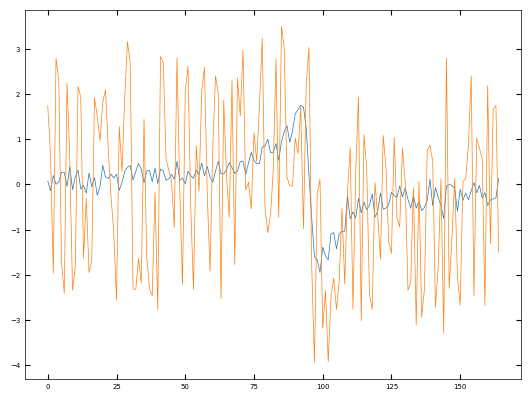

In [36]:
import matplotlib.pyplot as plt

i = np.random.randint(0, X_data_no_noise.shape[0])


plt.plot(X_data_no_noise[i, :, 0])
plt.plot(X_data_noise[i, :, 0])

torch.Size([165, 2])